# Midterm

Ok, we've reviewed a lot so far, so before we continue onto more specific kinds of analysis, using LLMs, and machine learning, complete this notebook that builds on the lessons in this series on pandas and EDA.

___

## Dataset
### *The Pudding*'s Film Dialogue Data

The dataset that we're working with in this lesson is taken from Hannah Andersen and Matt Daniels's *Pudding* essay, ["Film Dialogue from 2,000 screenplays, Broken Down by Gender and Age"](https://pudding.cool/2017/03/film-dialogue/). The dataset provides information about 2,000 films from 1925 to 2015, including characters’ names, genders, ages, how many words each character spoke in each film, the release year of each film, and how much money the film grossed. They included character gender information because they wanted to contribute data to a broader conversation about how "white men dominate movie roles."

___

## Import Pandas

In [1]:
import pandas as pd
pd.options.display.max_rows = 200

## Import the Data

In [58]:
film_df = pd.read_csv('../data/Pudding/Pudding-Film-Dialogue-Clean.csv', delimiter=",", encoding='utf-8')

## Overview

To look at a random *n* number of rows in a DataFrame, we can use a method called `.sample()`.

In [3]:
film_df.sample(10)

,title,release_year,character,gender,words,proportion_of_dialogue,age,gross,script_id
304,Awakenings,1990,Hospital Direct,man,217,0.018205,NaN,107.0,706
11705,Yes Man,2008,Allison,woman,3058,0.125885,28.0,118.0,3759
4173,Antitrust,2001,Brian Bissel,man,416,0.021494,24.0,16.0,1669
18548,Super,2010,Frank Darbo,man,2154,0.331487,44.0,NaN,7057
5463,Clash of the Titans,2010,Cassiopeia,woman,593,0.039350,44.0,179.0,2019
1682,Indiana Jones and the Temple of Doom,1984,Shaman,man,157,0.029950,69.0,466.0,1036
4699,The Big Blue,1988,Supervisor,man,232,0.012808,NaN,NaN,1815
22756,Prisoners,2013,Franklin Birch,man,371,0.051635,44.0,65.0,9083
21774,Red Lights,2012,Traci Northrop,woman,113,0.011025,30.0,NaN,8490
22457,Glory Road,2006,Moe Iba,man,494,0.043288,NaN,56.0,8871


Generate information about all the columns in the data 

In [4]:
film_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23047 entries, 0 to 23046
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   title                   23047 non-null  object 
 1   release_year            23047 non-null  int64  
 2   character               23047 non-null  object 
 3   gender                  23047 non-null  object 
 4   words                   23047 non-null  int64  
 5   proportion_of_dialogue  23047 non-null  float64
 6   age                     18262 non-null  float64
 7   gross                   19386 non-null  float64
 8   script_id               23047 non-null  int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 1.6+ MB


Just like Python has different data types, Pandas has different data types, too. These data types are automatically assigned to columns when we read in a CSV file. We can check these Pandas data types with the [`.dtypes` method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html).



| **Pandas Data Type** |  **Explanation**                                                                                   |
|:-------------:|:---------------------------------------------------------------------------------------------------:|
| `object`         | string                                                                               |
| `float64`         | float                                               |
| `int64`       | integer                                                        |
| `datetime64`       |  date time              

Make a histogram of the DataFrame

array([[<Axes: title={'center': 'release_year'}>,
        <Axes: title={'center': 'words'}>],
       [<Axes: title={'center': 'proportion_of_dialogue'}>,
        <Axes: title={'center': 'age'}>],
       [<Axes: title={'center': 'gross'}>,
        <Axes: title={'center': 'script_id'}>]], dtype=object)

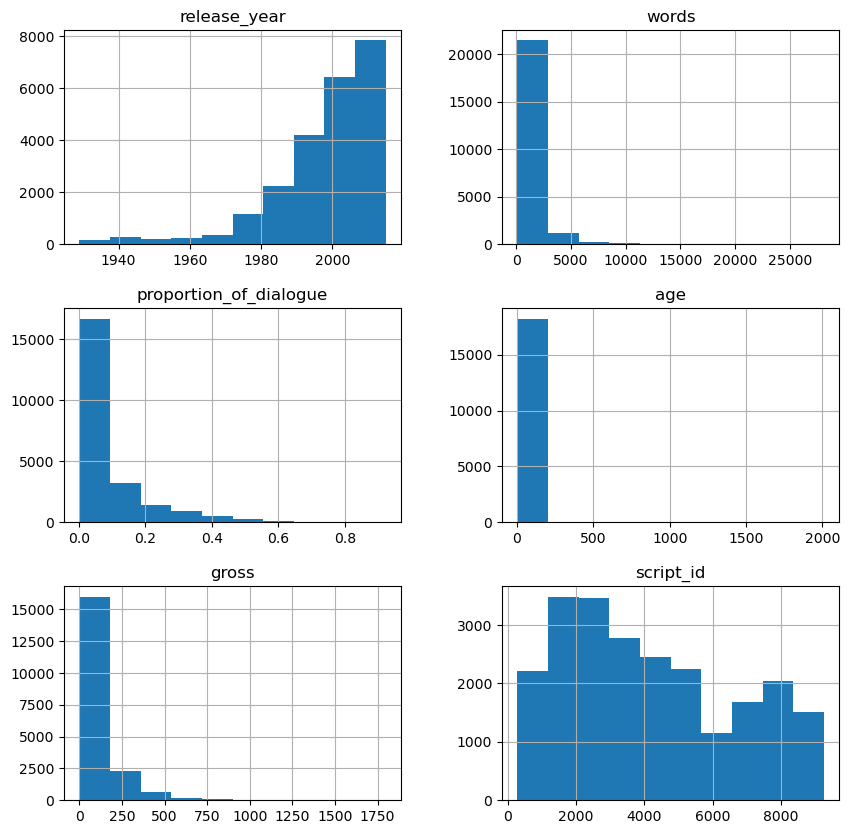

In [5]:
film_df.hist(figsize=(10,10))

Generate descriptive statistics for all the columns in the data 

In [6]:
film_df.describe(include='all')

,title,release_year,character,gender,words,proportion_of_dialogue,age,gross,script_id
count,23047,23047.000000,23047,23047,23047.000000,23047.000000,18262.000000,19386.000000,23047.000000
unique,1994,NaN,17543,3,NaN,NaN,NaN,NaN,NaN
top,Lone Star,NaN,Doctor,man,NaN,NaN,NaN,NaN,NaN
freq,40,NaN,37,16131,NaN,NaN,NaN,NaN,NaN
mean,NaN,1998.132425,NaN,NaN,907.902634,0.086518,42.275052,106.735428,4194.804486
std,NaN,14.746052,NaN,NaN,1399.616135,0.107746,57.912595,145.861933,2473.037601
min,NaN,1929.000000,NaN,NaN,101.000000,0.001537,3.000000,0.000000,280.000000
25%,NaN,1992.000000,NaN,NaN,193.000000,0.019773,30.000000,22.000000,2095.000000
50%,NaN,2001.000000,NaN,NaN,396.000000,0.042423,39.000000,56.000000,3694.000000
75%,NaN,2009.000000,NaN,NaN,980.000000,0.104171,50.000000,136.000000,6224.500000


### ❓ What patterns or outliers do you notice?

With 3 unique gender labels, 16,131 are labeled man which is a large number of men counts. There is a steady pattern of film releases as the mean year is 1998 with ranges being 1929 and 2015. A big difference between the min words spoken by characters and the max (101 and 28102). I also notice outliers in the ages from the data chart. THe range is 3 to 2009 but the mean is 42.28. There is a big difference between gross earnings as the minimum is 0 and maximum is 1798. 

## Drop Rows

In [7]:
film_df[film_df['age'] > 100]

,title,release_year,character,gender,words,proportion_of_dialogue,age,gross,script_id
4024,American Psycho,2000,Harold Carnes,man,434,0.025271,2000.0,24.0,1639
5254,Case 39,2009,Margaret Sulliv,woman,310,0.037944,2009.0,15.0,1962
5370,Chaos,2005,Bernie Callo,man,244,0.015051,2005.0,NaN,1985
5950,The Departed,2006,Realtor,man,148,0.005575,2006.0,175.0,2144
6899,Get Carter,2000,Thorpey,man,133,0.026552,2000.0,24.0,2380
7787,Into the Wild,2007,Bull,man,188,0.009936,2007.0,23.0,2625
7968,Jay and Silent Bob Strike Back,2001,Silent Bob'S Mo,woman,224,0.009292,2001.0,46.0,2673
9233,Never Been Kissed,1999,Monty Malik,man,104,0.005219,1999.0,95.0,2986
9617,The Piano,1993,Nessie,woman,116,0.012262,1993.0,84.0,3095
9819,Raging Bull,1980,Reporter,man,300,0.013364,1980.0,NaN,3169


If you want to double check, you can examine the [data that the Pudding shared here](https://github.com/matthewfdaniels/scripts/blob/graphs/character_list5.csv) (you can control + F to search for specific characters).

In [8]:
film_df = film_df.drop(film_df[film_df['age'] > 100].index) 

In [9]:
film_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23031 entries, 0 to 23046
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   title                   23031 non-null  object 
 1   release_year            23031 non-null  int64  
 2   character               23031 non-null  object 
 3   gender                  23031 non-null  object 
 4   words                   23031 non-null  int64  
 5   proportion_of_dialogue  23031 non-null  float64
 6   age                     18246 non-null  float64
 7   gross                   19373 non-null  float64
 8   script_id               23031 non-null  int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 1.8+ MB


In [10]:
film_df[film_df['age'] > 100]

,title,release_year,character,gender,words,proportion_of_dialogue,age,gross,script_id


## Rename Columns

In [11]:
film_df = film_df.rename(columns={'imdb_character_name': 'character', 'year': 'release_year'})

In [12]:
film_df.head()

,title,release_year,character,gender,words,proportion_of_dialogue,age,gross,script_id
0,The Bridges of Madison County,1995,Betty,woman,311,0.048639,35.0,142.0,280
1,The Bridges of Madison County,1995,Carolyn Johnson,woman,873,0.136534,NaN,142.0,280
2,The Bridges of Madison County,1995,Eleanor,woman,138,0.021583,NaN,142.0,280
3,The Bridges of Madison County,1995,Francesca Johns,woman,2251,0.352049,46.0,142.0,280
4,The Bridges of Madison County,1995,Madge,woman,190,0.029715,46.0,142.0,280


## Filter

Find a specific film that you're intersted and then filter the DataFrame for only rows relevant to that film. 

If you want to search for films by decade and genre, you can [search the with the Pudding's handy data viz here](https://pudding.cool/2017/03/film-dialogue/embed.html).

In [14]:
film_filter = 'Scream'
scream_film_df = film_df[film_df['title'] == film_filter]
scream_film_df



,title,release_year,character,gender,words,proportion_of_dialogue,age,gross,script_id
14753,Scream,1996,Billy,man,1326,0.151508,26.0,202.0,4920
14754,Scream,1996,Casey,woman,461,0.052674,21.0,202.0,4920
14755,Scream,1996,Deputy Dewey,man,804,0.091865,25.0,202.0,4920
14756,Scream,1996,Gale Weathers,woman,895,0.102262,32.0,202.0,4920
14758,Scream,1996,Randy,man,870,0.099406,26.0,202.0,4920
14759,Scream,1996,Sheriff Burke,man,396,0.045247,55.0,202.0,4920
14760,Scream,1996,Sidney,woman,1565,0.178816,23.0,202.0,4920
14761,Scream,1996,Stuart,man,859,0.098149,26.0,202.0,4920
14762,Scream,1996,Tatum,woman,1272,0.145338,23.0,202.0,4920
14763,Scream,1996,Tv Reporter #1,woman,142,0.016225,NaN,202.0,4920


If you want to sort by characters who speak the most, feel free to add `.sort_values(by='words', ascending=False)`

In [23]:
scream_film_df = scream_film_df.sort_values(by='words', ascending=False)
scream_film_df

,title,release_year,character,gender,words,proportion_of_dialogue,age,gross,script_id
14760,Scream,1996,Sidney,woman,1565,0.178816,23.0,202.0,4920
14753,Scream,1996,Billy,man,1326,0.151508,26.0,202.0,4920
14762,Scream,1996,Tatum,woman,1272,0.145338,23.0,202.0,4920
14756,Scream,1996,Gale Weathers,woman,895,0.102262,32.0,202.0,4920
14758,Scream,1996,Randy,man,870,0.099406,26.0,202.0,4920
14761,Scream,1996,Stuart,man,859,0.098149,26.0,202.0,4920
14755,Scream,1996,Deputy Dewey,man,804,0.091865,25.0,202.0,4920
14754,Scream,1996,Casey,woman,461,0.052674,21.0,202.0,4920
14759,Scream,1996,Sheriff Burke,man,396,0.045247,55.0,202.0,4920
14763,Scream,1996,Tv Reporter #1,woman,142,0.016225,NaN,202.0,4920


Now pick a character from this film (or another character) and filter the DataFrame by character.

In [25]:
character = "Billy"
character_filter = scream_film_df[scream_film_df['character'] == character]
character_filter

,title,release_year,character,gender,words,proportion_of_dialogue,age,gross,script_id
14753,Scream,1996,Billy,man,1326,0.151508,26.0,202.0,4920


In [28]:
character_filter

,title,release_year,character,gender,words,proportion_of_dialogue,age,gross,script_id
14753,Scream,1996,Billy,man,1326,0.151508,26.0,202.0,4920


### ❓ How does this data align with your experience/knowledge of the film?
This data aligns with my knowledge of Scream because I have the general idea of how long a character is seen and have a rough grasp of the amount of words each character speaks compared to each other. Although it has been a long time since I watched Scream, I know Sidney is the protagonist and Billy who is her boyfriend is a main character, hence it makes sense that they speak the most. 

### ❓ How do these specific examples influence your thoughts about the data collection and categorization process? What would you have done differently (if anything)?

I feel like the data collection is very concise and organized in a way that it is easy to decipher what the numbers represent and it makes it better if they are sorted so the data is more categorized to a specific idea. I thought it was interesting how the proportion of dialogue is also collected and am intrigued how the numbers work together to create additional data. Something that I personally would have done differently is label the character's role in the film so that there is more context to the numbers that may answer the why's and how's.

## Sort Values

Sort the DataFrame from the character who has the highest `proportion_of_dialogue` to the lowest.  Then examine the first 20 rows with `.head(20)` or `[:20]`.

In [49]:
film_sort = scream_film_df.sort_values(by= 'proportion_of_dialogue', ascending=False)
first_20 = film_sort.head(20)
first_20

,title,release_year,character,gender,words,proportion_of_dialogue,age,gross,script_id
14760,Scream,1996,Sidney,woman,1565,0.178816,23.0,202.0,4920
14753,Scream,1996,Billy,man,1326,0.151508,26.0,202.0,4920
14762,Scream,1996,Tatum,woman,1272,0.145338,23.0,202.0,4920
14756,Scream,1996,Gale Weathers,woman,895,0.102262,32.0,202.0,4920
14758,Scream,1996,Randy,man,870,0.099406,26.0,202.0,4920
14761,Scream,1996,Stuart,man,859,0.098149,26.0,202.0,4920
14755,Scream,1996,Deputy Dewey,man,804,0.091865,25.0,202.0,4920
14754,Scream,1996,Casey,woman,461,0.052674,21.0,202.0,4920
14759,Scream,1996,Sheriff Burke,man,396,0.045247,55.0,202.0,4920
14763,Scream,1996,Tv Reporter #1,woman,142,0.016225,NaN,202.0,4920


Sort the DataFrame from the character who has the lowest `proportion_of_dialogue` to the highest. Then examine the first 20 rows with `.head(20)` or `[:20]`.

In [50]:
film_sort = scream_film_df.sort_values(by= 'proportion_of_dialogue', ascending=True)
first_20 = film_sort.head(20)
first_20

,title,release_year,character,gender,words,proportion_of_dialogue,age,gross,script_id
14763,Scream,1996,Tv Reporter #1,woman,142,0.016225,NaN,202.0,4920
14759,Scream,1996,Sheriff Burke,man,396,0.045247,55.0,202.0,4920
14754,Scream,1996,Casey,woman,461,0.052674,21.0,202.0,4920
14755,Scream,1996,Deputy Dewey,man,804,0.091865,25.0,202.0,4920
14761,Scream,1996,Stuart,man,859,0.098149,26.0,202.0,4920
14758,Scream,1996,Randy,man,870,0.099406,26.0,202.0,4920
14756,Scream,1996,Gale Weathers,woman,895,0.102262,32.0,202.0,4920
14762,Scream,1996,Tatum,woman,1272,0.145338,23.0,202.0,4920
14753,Scream,1996,Billy,man,1326,0.151508,26.0,202.0,4920
14760,Scream,1996,Sidney,woman,1565,0.178816,23.0,202.0,4920


Sort the DataFrame from the character who speaks the least number of `words` to the character who speaks the most number of words. Then examine the first 20 rows with `.head(20)` or `[:20]`.

In [51]:
film_sort = scream_film_df.sort_values(by= 'proportion_of_dialogue', ascending=True)
first_20 = film_df.head(20)
first_20

,title,release_year,character,gender,words,proportion_of_dialogue,age,gross,script_id
14763,Scream,1996,Tv Reporter #1,woman,142,0.016225,NaN,202.0,4920
14759,Scream,1996,Sheriff Burke,man,396,0.045247,55.0,202.0,4920
14754,Scream,1996,Casey,woman,461,0.052674,21.0,202.0,4920
14755,Scream,1996,Deputy Dewey,man,804,0.091865,25.0,202.0,4920
14761,Scream,1996,Stuart,man,859,0.098149,26.0,202.0,4920
14758,Scream,1996,Randy,man,870,0.099406,26.0,202.0,4920
14756,Scream,1996,Gale Weathers,woman,895,0.102262,32.0,202.0,4920
14762,Scream,1996,Tatum,woman,1272,0.145338,23.0,202.0,4920
14753,Scream,1996,Billy,man,1326,0.151508,26.0,202.0,4920
14760,Scream,1996,Sidney,woman,1565,0.178816,23.0,202.0,4920


### ❓ What patterns do you notice here? What surprises you or doesn't surprise you?

I notice how the proportion of dialogue is related to the words that the character speak. It is not surprising that Sidney who has the highest proportion of dialogue speaks the most in the film. The two datasets are identical meaning they are related. The main significant characters have more lines. 

## Groupby

Group by film and then calculate the sum total for every column.

In [59]:
grouped_df = film_df.groupby('title').sum()
grouped_df

/var/folders/mp/wqy182n95j34w5_mys3hydpm0000gn/T/ipykernel_2838/1211991941.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_df = film_df.groupby('title').sum()


,release_year,words,proportion_of_dialogue,age,gross,script_id
title,,,,,,
(500) Days of Summer,26117,18500,1.0,378.0,481.0,19942
10 Things I Hate About You,23988,19680,1.0,307.0,780.0,18144
12 Years a Slave,56364,19628,1.0,712.0,1680.0,42476
12 and Holding,30075,15968,1.0,513.0,0.0,22710
127 Hours,8040,5145,1.0,114.0,80.0,6080
...,...,...,...,...,...,...
Zero Effect,13986,13927,1.0,227.0,21.0,57106
Zerophilia,16040,16686,1.0,160.0,0.0,30144
Zodiac,62217,14656,1.0,1071.0,1271.0,201221


Group by film, isolate the `words` column, and then calculate the sum total for every column.

In [60]:
grouped_df = film_df.groupby('title')['words'].sum()
grouped_df

title
(500) Days of Summer          18500
10 Things I Hate About You    19680
12 Years a Slave              19628
12 and Holding                15968
127 Hours                      5145
                              ...  
Zero Effect                   13927
Zerophilia                    16686
Zodiac                        14656
eXistenZ                       9447
xXx                            8285
Name: words, Length: 1994, dtype: int64

Group by film AND gender, isolate the column `words`, and then calculate the sum total for every column.

*Note: Remember that to group by multiple columns, you need to put the column names in square brackets `[]`.*

In [61]:
grouped_df = film_df.groupby(['title', 'gender'])['words'].sum()
grouped_df

title                       gender
(500) Days of Summer        man       12762
                            woman      5738
10 Things I Hate About You  man       10688
                            woman      8992
12 Years a Slave            man       16176
                                      ...  
Zodiac                      woman      1421
eXistenZ                    man        5695
                            woman      3752
xXx                         man        7287
                            woman       998
Name: words, Length: 3936, dtype: int64

## Filter, Then Groupby

Filter the DataFrame for only characters labeled as `woman`

In [62]:
women_filter = film_df['gender'] == 'woman'

In [63]:
women_film_df = film_df[women_filter]

Filter the DataFrame for only characters labeled as `man`

In [64]:
men_filter = film_df['gender'] == 'man'

In [65]:
men_film_df = film_df[men_filter]

Now group `women_film_df` by film, isolate the `words` column, and sum the `words` spoken by women.

In [66]:
women_film_df.groupby('title')['words'].sum()

title
(500) Days of Summer          5738
10 Things I Hate About You    8992
12 Years a Slave              3452
12 and Holding                5324
127 Hours                      809
                              ... 
Zero Effect                   2216
Zerophilia                    4612
Zodiac                        1421
eXistenZ                      3752
xXx                            998
Name: words, Length: 1940, dtype: int64

Assign this Series to a new variable `women_by_film`

In [67]:
women_by_film = women_film_df.groupby('title')['words'].sum()
women_by_film

title
(500) Days of Summer          5738
10 Things I Hate About You    8992
12 Years a Slave              3452
12 and Holding                5324
127 Hours                      809
                              ... 
Zero Effect                   2216
Zerophilia                    4612
Zodiac                        1421
eXistenZ                      3752
xXx                            998
Name: words, Length: 1940, dtype: int64

Using the same construction, make a new another new variable `men_by_film`

In [68]:
men_by_film = men_film_df.groupby('title')['words'].sum()
men_by_film

title
(500) Days of Summer          12762
10 Things I Hate About You    10688
12 Years a Slave              16176
12 and Holding                10644
127 Hours                      4336
                              ...  
Zero Effect                   11711
Zerophilia                    12074
Zodiac                        13235
eXistenZ                       5695
xXx                            7287
Name: words, Length: 1992, dtype: int64

Sort `women_by_film` from the film with the most words to the film with the least words. Then examine the top 20 values.

In [69]:
women_by_film.sort_values(ascending=False)[:20]

title
Sex and the City               25184
Stepmom                        25014
Sense and Sensibility          23922
The Help                       21540
Beloved                        19594
Ghost World                    18692
Precious                       17536
Juno                           17534
Music of the Heart             17274
Drag Me to Hell                17236
Margaret                       17229
Amelia                         17014
The Horse Whisperer            16920
Copycat                        16078
Frances                        15978
Agnes of God                   15732
He's Just Not That Into You    15708
An Education                   14330
The Birds                      14284
Wild at Heart                  14014
Name: words, dtype: int64

Assign this sorted list of movies to the variable `top20_women`

In [70]:
top20_women = women_by_film.sort_values(ascending=False)[:20]
top20_women

title
Sex and the City               25184
Stepmom                        25014
Sense and Sensibility          23922
The Help                       21540
Beloved                        19594
Ghost World                    18692
Precious                       17536
Juno                           17534
Music of the Heart             17274
Drag Me to Hell                17236
Margaret                       17229
Amelia                         17014
The Horse Whisperer            16920
Copycat                        16078
Frances                        15978
Agnes of God                   15732
He's Just Not That Into You    15708
An Education                   14330
The Birds                      14284
Wild at Heart                  14014
Name: words, dtype: int64

Using the same construction, make a new variable `top20_men`

In [71]:
top20_men = men_by_film.sort_values(ascending=False)[:20]
top20_men

title
Casino                    57944
JFK                       50752
A Few Good Men            36484
Funny People              36278
Magnolia                  33024
High Fidelity             31114
The Dark Knight           30290
Troy                      29712
Gran Torino               29092
Life                      27748
Observe and Report        27534
Apt Pupil                 27428
Analyze This              26548
The Hangover              26538
Mr. Deeds Goes to Town    26508
Wall Street               26440
Jackie Brown              25984
Sling Blade               24964
Meet John Doe             24520
The Departed              24518
Name: words, dtype: int64

### ❓ What patterns do you notice here? What surprises you or doesn't surprise you?

I notice the films that have titles that are centered towards female characters have high word counts by women. Comparing the top 20 data overall the men have significantly higher word counts meaning they speak more in the films. I recognize some films and know that the context and plot is also improtant when it comes to word count because some are noticeably ones with a lot of speaking. 

### ❓ What patterns do you notice here? What surprises you or doesn't surprise you?

I notice the films that have titles that are centered towards female characters have high word counts by women. Comparing the top 20 data overall the men have significantly higher word counts meaning they speak more in the films. I recognize some films and know that the context and plot is also improtant when it comes to word count because some are noticeably ones with a lot of speaking.

## Saving Plots

Make a bar chart of `top20_women`. Give the chart a title, and specify a color.

Text(0, 0.5, 'Word Count')

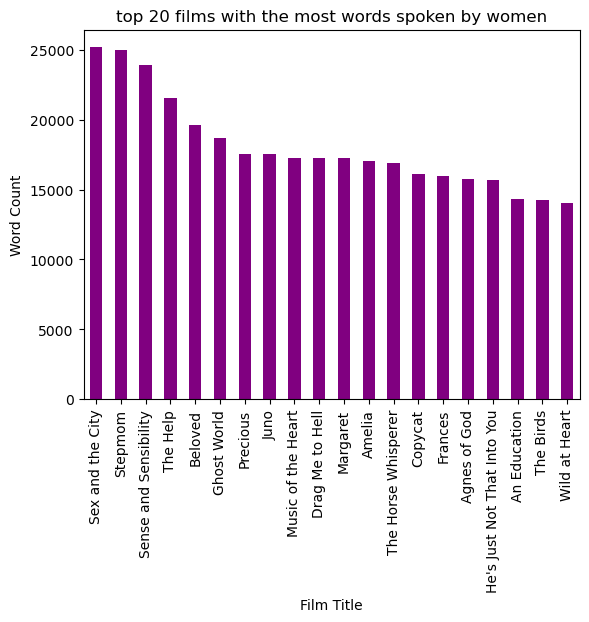

In [85]:
top20_women.plot(
    kind='bar',
    color = 'purple',
   
)
plt.title('top 20 films with the most words spoken by women')
plt.xlabel('Film Title')
plt.ylabel('Word Count')


To save the plot, you can use `ax.figure.savefig()` and the name of the file in quotation marks.

Text(20.347222222222214, 0.5, 'Word Count')

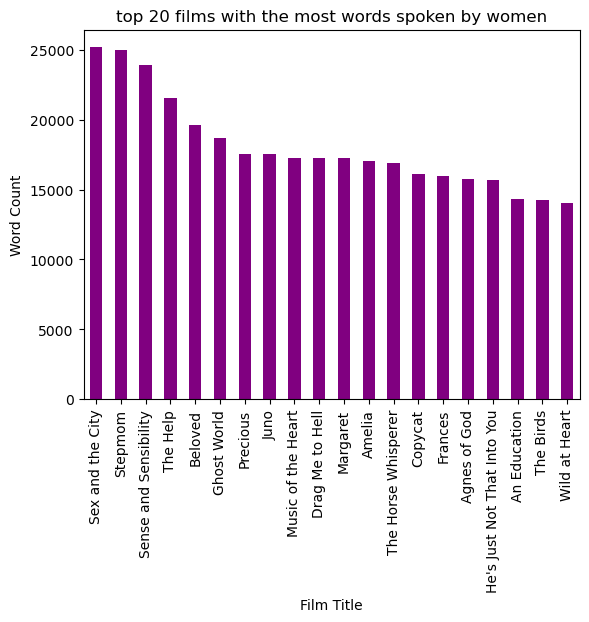

In [87]:
ax = top20_women.plot(
    kind='bar',
    color='purple'
)
ax.figure.savefig('./figures/top20_women.png')
plt.title('top 20 films with the most words spoken by women')
plt.xlabel('Film Title')
plt.ylabel('Word Count')

Look in the file browser on the left and double click the PNG file. How does it look? Uh oh!

Sometimes parts of a plot will get cut off when you save it. To fix this issue, you can use a function from the Matplotlib library called `plt.tight_layout()`, which will adjust the plot before you save it.

To use this function, you need to `import matplotlib.pyplot as plt`.

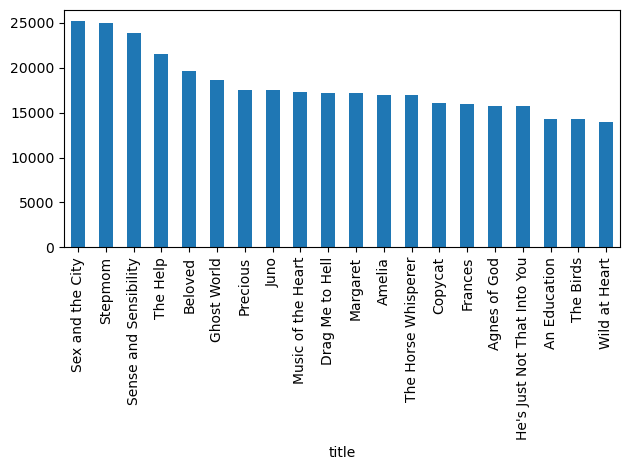

In [88]:
import matplotlib.pyplot as plt

ax = top20_women.plot(kind='bar')
plt.tight_layout()
ax.figure.savefig('top20_women.png')

## Scatter Plots and Line Plots

Let's make a scatter plot that shows how many words women and men speak based on their age.

In [89]:
women_film_df.groupby('age')['words'].sum().reset_index()

,age,words
0,4.0,272
1,5.0,132
2,6.0,2406
3,7.0,8158
4,8.0,3260
5,9.0,6540
6,10.0,11771
7,11.0,11462
8,12.0,17316
9,13.0,12580


In [90]:
women_age_words = women_film_df.groupby('age')['words'].sum().reset_index()

In [91]:
men_age_words = men_film_df.groupby('age')['words'].sum().reset_index()

<Axes: xlabel='age', ylabel='words'>

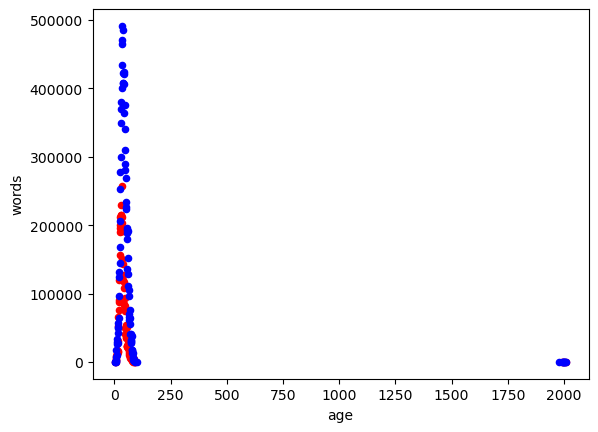

In [92]:
ax = women_age_words.plot(kind='scatter', x='age', y='words', color='red')
men_age_words.plot(ax=ax, kind='scatter', x='age', y='words', color='blue')

Now let's make a line plot of the exact same data. Copy and paste the code in the cell above and change it to produce a line plot instead of a scatter plot.

<Axes: xlabel='age'>

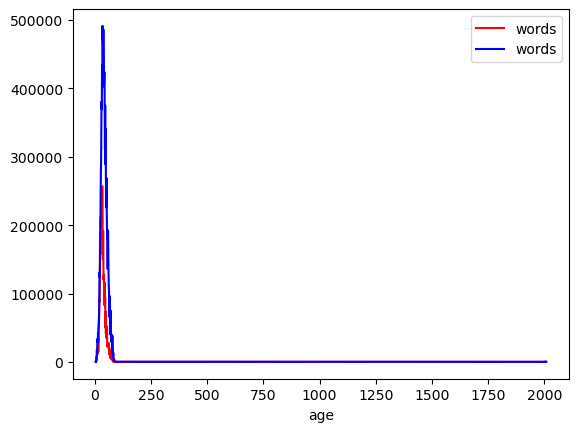

In [93]:
ax = women_age_words.plot(kind='line', x='age', y='words', color='red')
men_age_words.plot(ax=ax, kind='line', x='age', y='words', color='blue')

## Reflection

Write about 250-500 words in response to each question below.

### 1. Discuss your impressions of EDA techniques?

I knew the numbers and labels that are commonly associated with EDA but I was surprised to see how detailed they get and how much we could do working with the data. I can see how they are very crucial in doing analysis and having a good understanding of the structure can be a big help in manipulating the data. The EDA techniques make it useful to see patterns in data and recognize potential issues or trends in general. I was also amazed to see how easily and quickly the data could be plotted to charts for better visual understanding and comparisons. Something that I thought of is that if we did not have efficient programming like this, it would be very difficult to collect information and time-consuming to organize it by hand. I really like how the data is quickly worked with. I can see how people use these and analyze the data to make further decisions. EDA would have a significant influence on bringing insight into data on topics that one may not be well aware of. For example, if I had not done these workout exercises, I would not have been aware of how big the number differences were in data and how much they compared to each other such as the differences with women and men's word counts in films. I enjoyed working with the code and observing how one word could make a difference in how the output turns out or how the visualization turns out. 

### 2. What were some of the hurdles that you encountered moving through the EDA process?

Some hurdles that I encountered were the long lines of code that had to have a specific structure in order for them to run. It makes sense how the parameters and code syntax work but at times I forgot that I had to include commas in some places or apostrophes. Other than that, some other hurdles were keeping up with what I named my variables and how I can reuse them to make the code more simple. It helps to have names for the variables so I, the one that is coding, knows what the code implies, and naming them specifically such as "top_20_films" can bring context to what exactly the code is trying to achieve. I can also see how when working with a large amount of data, it can be tricky to have them appear in the best ways possible for example, deciding if we should work with scatter plots or line graphs, especially since there were many plots that could have made it difficult for some people to observe the small details. Other hurdles were related to having a lot of data in one place which helped me to recognize the importance of splitting data or specifying which ones to show that impact how much is produced. The sorting also gave me a difficult time because it was more additional code to add to existing ones that made it sort of confusing for me. However, it made sense to realize how they are needed to directly work with what I already specified and set. 

### 3. Explain why you chose some of the variables and questions to pursue. Also, what questions would you explore next, and why.

I chose the variables to pursue because they directly relate to the data that were collected and as I noticed patterns or some inconsistencies, it brought questions to my mind. The questions then impacted what variables I could make and what data I could bring out to further explore my question. With the films dataset I was analyzing, it was interesting to compare data of men and women and the numbers relate to other data. For example, the proportion of dialogue relating to words spoken in films and how some films that are more centered towards women have high word counts by women. Having the numbers appear right on the screen makes working with the questions fun and creative in my opinion. Some questions that I would like to explore next is the further impact of each film that goes beyond the gross earnings, such as trends that were influenced by certain films which could be determined by the year the film was released and how often a trend was searched or brought up before and after the film release date. Although they may not be directly related and be the causes of trends, it would be interesting to explore how films impacted society in those ways. 